# Related Issues

## [Research Request - Transit Agency Peer Groups subtask: NTD Characteristics #1442](https://github.com/cal-itp/data-analyses/issues/1442)


## via Juan Matute  email 5/29/2025
In a more advanced version, operators would be clustered into groups of 10 or more based on: 

- mode of service, 
- vehicles available, 
- population density of service territory, 
- job density of service territory, and, perhaps, 
- service area overlap with other transit operators (a GTFS spatial analysis exercise).  

An agency scoring in the bottom 1 or 2 of the cluster would get some remedial help in their triennial audit.Or face consolidation (FWIW, I like the BC Transit model for consolidation starting in 1979).  

Several large transit operators, especially those operating rail, wouldn't be candidates for consolidation and wouldn't fit this clustering method and would instead rely on a triennial audit, where I would expect trends over time for GTFS-RT quality, customer experience metrics (Transit App surveys or mystery shops) and several of these metrics to be considered holistically.  

And perhaps agency costs would be adjusted for regional consumer price index maintained by California Department of Industrial Relations.  Either that or they'd just be clustered with regional peers.


## [Transit Agency Peer Groups literature review #1562](https://github.com/cal-itp/data-analyses/issues/1562)

Link to literature document (requires sharepoint): https://caltrans.sharepoint.com/:w:/r/sites/DOTPMPHQ-DDSContractors/_layouts/15/Doc.aspx?sourcedoc=%7B61CE5D08-BDAC-4947-ADE3-59CA472CF679%7D&file=transit_peer_groups_lit_review.docx&action=default&mobileredirect=true

## [IBM Definition of Hierarchial Clustering](https://www.ibm.com/think/topics/hierarchical-clustering)
>There are two types of hierarchical clustering:
>- `Agglomerative` or bottom-up approach1 that repeatedly merges clusters into larger ones until a single cluster emerges.
>- `Divisive` or top-down approach that2 starts with all data in a single cluster and continues to split out successive clusters until all clusters are singletons.

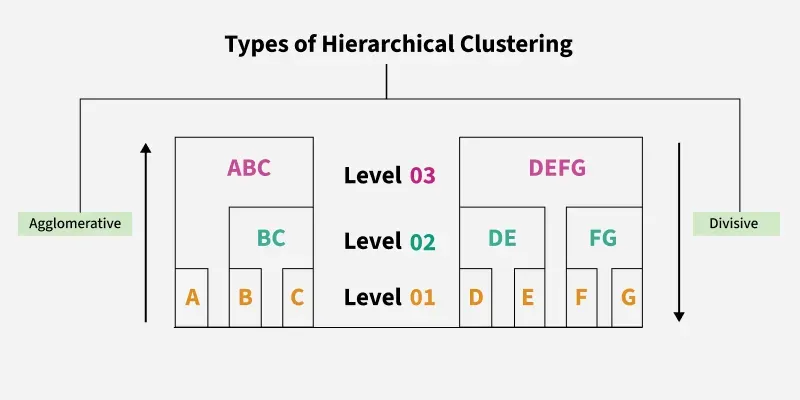

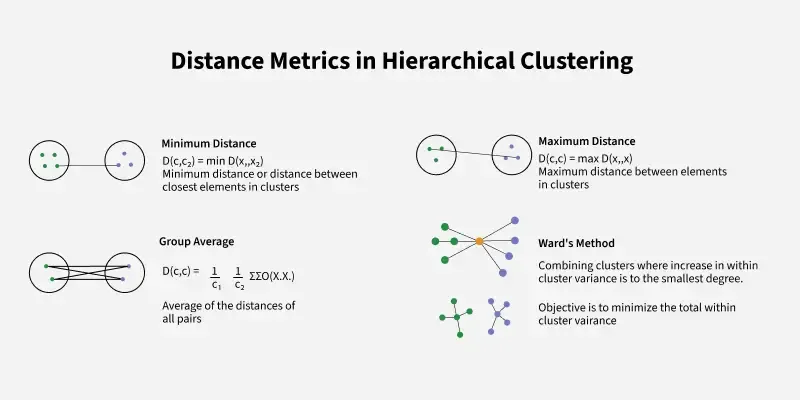

## Scikit-Learns References
- [2.3 Clustering](https://scikit-learn.org/stable/modules/clustering.html)
- [2.3.6 Hierarchical clustering](https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering). Explains to use the `AgglomerativeClustering` object with `linkage ="ward"`

Ward:
>Ward minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach. 

## [Exploratory clustering analysis with NTD data #1580](https://github.com/cal-itp/data-analyses/issues/1580)

What this notebook is for

**Initial Variables to Explore:**

- Ridership (e.g., annual unlinked trips)
- Vehicle Revenue Miles (VRM)
- Population density of service area (or similar population characteristics available from NTD)

**Objectives:**

- Perform EDA to understand distributions, scaling/normalization needs, and correlations between initial variables.
- Test hierarchical clustering approaches (starting with Ward’s method).
- Visualize early clustering results to assess separation and interpretability.
- Flag any early issues with data availability, variable selection, or clustering behavior.

In [1]:
# scikit learns imports for clustering
import pandas as pd
from sklearn.cluster import AgglomerativeClustering  # has linage arg for "ward"

---

## Example of scikit learns Agglomerative clustering with ward's linkage


In [2]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# StandardScaler normalize numeric vales (z-score standardization) for each column
# OneHotEncoder turns categorical column into binary columns for each variable (mode_rail, mode_bus, mode_ferry), and assigns 0 or 1.

# Column Transformer used to apply standardscaler and onehotencoder to dataframe (preprocessing)
# Pipeline to tie the column transformer preprocessing AND Agglomerative clustering

In [3]:
initial_df = pd.DataFrame(
    {
        "farebox_recovery": [0.5, 0.7, 0.4, 0.3, 0.6],
        "annual_ridership": [1000000, 2000000, 1500000, 1800000, 1200000],
        "opex": [5000000, 8000000, 7000000, 6500000, 6000000],
        "vrm": [100000, 120000, 110000, 115000, 105000],
        "voms": [80, 90, 85, 88, 83],
        "mode": ["Bus", "Rail", "Bus", "Ferry", "Rail"],
        "service_type": [
            "Directly Operated",
            "Purchased",
            "Directly Operated",
            "Directly Operated",
            "Purchased",
        ],
        "region": ["West", "South", "West", "Northeast", "South"],
    }
)

initial_df

,farebox_recovery,annual_ridership,opex,vrm,voms,mode,service_type,region
0,0.5,1000000,5000000,100000,80,Bus,Directly Operated,West
1,0.7,2000000,8000000,120000,90,Rail,Purchased,South
2,0.4,1500000,7000000,110000,85,Bus,Directly Operated,West
3,0.3,1800000,6500000,115000,88,Ferry,Directly Operated,Northeast
4,0.6,1200000,6000000,105000,83,Rail,Purchased,South


In [4]:
# list out columns by numerical and categorical
numerical_cols = ["farebox_recovery", "annual_ridership", "opex", "vrm", "voms"]
categorical_cols = ["mode", "service_type", "region"]

In [5]:
# preprocessing
# applying standardscaler to numerical columns
# applying onehotencoder to categorical columns
preprocessor = ColumnTransformer(
    [
        ("num", StandardScaler(), numerical_cols),
        ("cat", OneHotEncoder(drop="first"), categorical_cols),
    ]
)

preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['farebox_recovery', 'annual_ridership',
                                  'opex', 'vrm', 'voms']),
                                ('cat', OneHotEncoder(drop='first'),
                                 ['mode', 'service_type', 'region'])])

In [6]:
# Clustering pipeline: Pipeline allows you to sequentially apply a list of transformers to preprocess the data and, if desired, 
# conclude the sequence with a final predictor for predictive modeling.
# setting up preprocessing step and then clusering

pipeline = Pipeline(
    [
        ("preprocessing", preprocessor),
        ("clustering", AgglomerativeClustering(n_clusters=3, linkage="ward")),
    ]
)

pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['farebox_recovery',
                                                   'annual_ridership', 'opex',
                                                   'vrm', 'voms']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['mode', 'service_type',
                                                   'region'])])),
                ('clustering', AgglomerativeClustering(n_clusters=3))])

In [7]:
# Fit and assign clusters
fitted_df = initial_df.copy()

fitted_df["cluster"] = pipeline.fit_predict(fitted_df)

display(
    initial_df,
    fitted_df
)

,farebox_recovery,annual_ridership,opex,vrm,voms,mode,service_type,region
0,0.5,1000000,5000000,100000,80,Bus,Directly Operated,West
1,0.7,2000000,8000000,120000,90,Rail,Purchased,South
2,0.4,1500000,7000000,110000,85,Bus,Directly Operated,West
3,0.3,1800000,6500000,115000,88,Ferry,Directly Operated,Northeast
4,0.6,1200000,6000000,105000,83,Rail,Purchased,South


,farebox_recovery,annual_ridership,opex,vrm,voms,mode,service_type,region,cluster
0,0.5,1000000,5000000,100000,80,Bus,Directly Operated,West,0
1,0.7,2000000,8000000,120000,90,Rail,Purchased,South,2
2,0.4,1500000,7000000,110000,85,Bus,Directly Operated,West,1
3,0.3,1800000,6500000,115000,88,Ferry,Directly Operated,Northeast,1
4,0.6,1200000,6000000,105000,83,Rail,Purchased,South,0


In [8]:
# results of preprocessing
feature_names = preprocessor.get_feature_names_out()
feature_names.tolist()
# can see how the categorical columns were split into binary columns for each option.

['num__farebox_recovery',
 'num__annual_ridership',
 'num__opex',
 'num__vrm',
 'num__voms',
 'cat__mode_Ferry',
 'cat__mode_Rail',
 'cat__service_type_Purchased',
 'cat__region_South',
 'cat__region_West']

In [9]:
processed = preprocessor.fit_transform(fitted_df)
display(type(processed), processed)
# see what the processed (scaled, normalized)data looks like?

numpy.ndarray

array([[ 0.        , -1.35581536, -1.5       , -1.41421356, -1.46726488,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ],
       [ 1.41421356,  1.35581536,  1.5       ,  1.41421356,  1.35439836,
         0.        ,  1.        ,  1.        ,  1.        ,  0.        ],
       [-0.70710678,  0.        ,  0.5       ,  0.        , -0.05643326,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ],
       [-1.41421356,  0.81348922,  0.        ,  0.70710678,  0.79006571,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.70710678, -0.81348922, -0.5       , -0.70710678, -0.62076591,
         0.        ,  1.        ,  1.        ,  1.        ,  0.        ]])

In [10]:
processes_df = pd.DataFrame(processed, columns=feature_names)
display(processes_df)
# can see how the numerical columns were standardized to z-scores.

,num__farebox_recovery,num__annual_ridership,num__opex,num__vrm,num__voms,cat__mode_Ferry,cat__mode_Rail,cat__service_type_Purchased,cat__region_South,cat__region_West
0,0.000000,-1.355815,-1.5,-1.414214,-1.467265,0.0,0.0,0.0,0.0,1.0
1,1.414214,1.355815,1.5,1.414214,1.354398,0.0,1.0,1.0,1.0,0.0
2,-0.707107,0.000000,0.5,0.000000,-0.056433,0.0,0.0,0.0,0.0,1.0
3,-1.414214,0.813489,0.0,0.707107,0.790066,1.0,0.0,0.0,0.0,0.0
4,0.707107,-0.813489,-0.5,-0.707107,-0.620766,0.0,1.0,1.0,1.0,0.0


## Test run using real data

### Reading in cleaned data from `transit_performance_metrics`
The same data from the transit performance metrics analysis. Initial data was merged data from the`mart_ntd_funding_and_expenses.fct_service_data_and_operating_expenses_time_series_by_mode_..` tables.

In [11]:
transit_metrics = pd.read_parquet(
    f"gs://calitp-analytics-data/data-analyses/ntd/raw_transit_performance_metrics_data.parquet"
)

In [12]:
transit_metrics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2091 entries, 0 to 2090
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   agency_name       2091 non-null   object  
 1   agency_status     2091 non-null   object  
 2   city              2091 non-null   object  
 3   mode              2091 non-null   object  
 4   service           2091 non-null   object  
 5   ntd_id            2091 non-null   object  
 6   reporter_type     2091 non-null   object  
 7   reporting_module  2091 non-null   object  
 8   state             2091 non-null   object  
 9   primary_uza_name  2091 non-null   object  
 10  year              2091 non-null   object  
 11  upt               2091 non-null   int64   
 12  vrh               2091 non-null   int64   
 13  vrm               2091 non-null   int64   
 14  opexp_total       2091 non-null   int64   
 15  RTPA              2091 non-null   object  
 16  _merge            2091 n

In [13]:
transit_metrics.sample(5)

,agency_name,agency_status,city,mode,service,ntd_id,reporter_type,reporting_module,state,primary_uza_name,year,upt,vrh,vrm,opexp_total,RTPA,_merge
1557,North County Transit District (NCTD),Active,Oceanside,Hybrid Rail,Directly Operated,90030,Full Reporter,Urban,CA,"San Diego, CA",2023,1684586,28503,627203,29883425,San Diego Association of Governments,both
914,City of Redondo Beach (BCT) - Transit Division...,Active,Redondo Beach,Demand Response,Purchased Transportation,90214,Full Reporter,Urban,CA,"Los Angeles--Long Beach--Anaheim, CA",2019,13669,6864,61701,602581,Southern California Association of Governments,both
1373,Los Angeles County (LACDPW) - Department of Pu...,Active,Alhambra,Bus,Purchased Transportation,90273,Reduced Reporter,Urban,CA,"Los Angeles--Long Beach--Anaheim, CA",2020,172590,6568,58784,421185,Southern California Association of Governments,both
1179,County of Placer (PCT/TART) - Department of Pu...,Active,Auburn,Bus,Purchased Transportation,90196,Full Reporter,Urban,CA,"Sacramento, CA",2020,7255,4275,67217,364508,Placer County Transportation Planning Agency,both
1376,Los Angeles County (LACDPW) - Department of Pu...,Active,Alhambra,Bus,Purchased Transportation,90273,Reduced Reporter,Urban,CA,"Los Angeles--Long Beach--Anaheim, CA",2021,95551,6550,58251,629121,Southern California Association of Governments,both


## value distribution of all numerical columns

In [14]:
transit_metrics.describe()

,upt,vrh,vrm,opexp_total
count,2.091000e+03,2.091000e+03,2.091000e+03,2.091000e+03
mean,2.660662e+06,1.161680e+05,1.754771e+06,2.223394e+07
std,1.405787e+07,3.934805e+05,5.856907e+06,8.622174e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.887900e+04,5.847500e+03,6.586950e+04,5.853455e+05
50%,7.961300e+04,1.750400e+04,2.583970e+05,1.841343e+06
75%,5.417190e+05,6.606900e+04,1.021278e+06,8.832687e+06
max,2.609022e+08,6.341989e+06,8.378382e+07,1.355086e+09



UPT


(<Axes: >,)

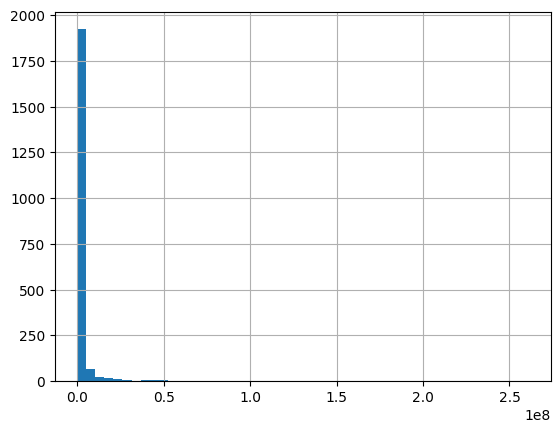

In [15]:
print("\nUPT"),
transit_metrics["upt"].hist(bins=50),


VRH


(<Axes: >,)

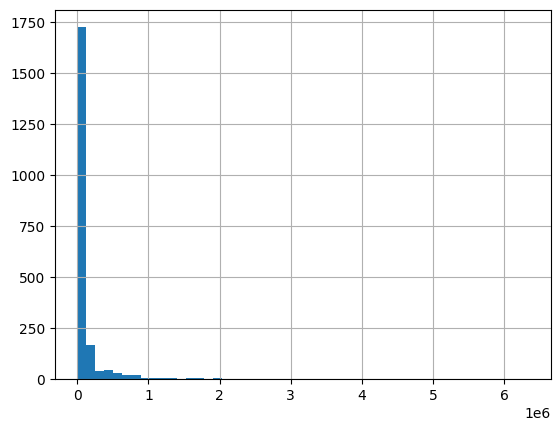

In [16]:
print("\nVRH"),
transit_metrics["vrh"].hist(bins=50),


VRM


(<Axes: >,)

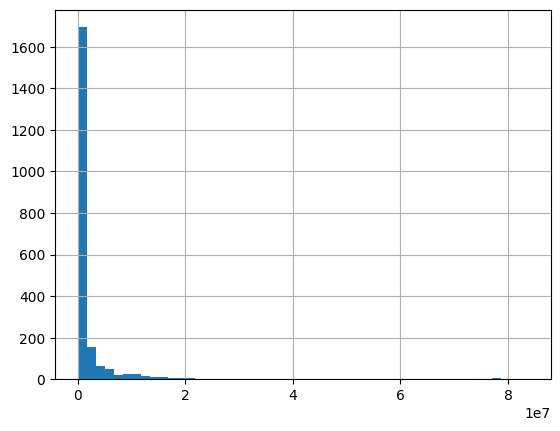

In [17]:
print("\nVRM"),
transit_metrics["vrm"].hist(bins=50),


Opex Total


<Axes: >

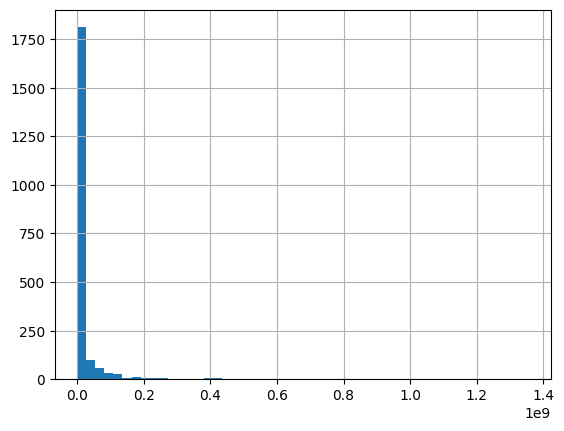

In [18]:
print("\nOpex Total"),
transit_metrics["opexp_total"].hist(bins=50)

## correlation analysis on numerical columns

In [19]:
transit_metrics.corr()

/tmp/ipykernel_1081/1829003294.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  transit_metrics.corr()


,upt,vrh,vrm,opexp_total
upt,1.000000,0.913598,0.770465,0.909886
vrh,0.913598,1.000000,0.865676,0.932693
vrm,0.770465,0.865676,1.000000,0.860128
opexp_total,0.909886,0.932693,0.860128,1.000000


## identify outliers

<Axes: >

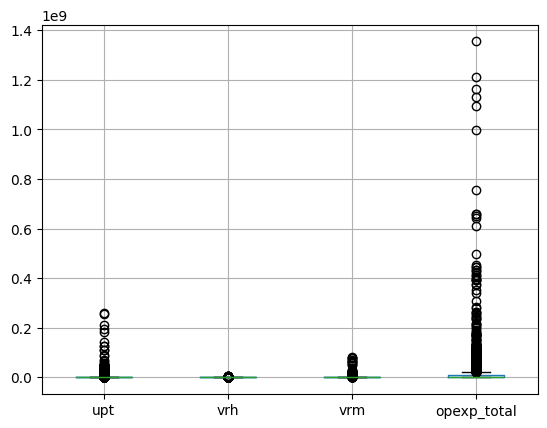

In [20]:
transit_metrics.boxplot()

### Testing `AgglomerativeClustering` on transit performance metrics

In [21]:
numerical_cols = [
    "upt",
    "vrh",
    "vrm",
    "opexp_total",
]

categorical_cols = [
    "mode",
    "service",
    "reporter_type",
    # "primary_uza_name",
]  # leaving out identier columns like name and city

# establishing pre-processing steps (normalizing, one-hot encoding)
preprocessor = ColumnTransformer(
    [
        ("num", StandardScaler(), numerical_cols),
        ("cat", OneHotEncoder(drop="first", sparse_output=False), categorical_cols),
    ]
)

preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['upt', 'vrh', 'vrm', 'opexp_total']),
                                ('cat',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['mode', 'service', 'reporter_type'])])

In [22]:
# establishing pipeline: 1. preprocessing, 2. clustering
pipeline = Pipeline(
    [
        ("preprocessing", preprocessor),
        ("clustering", AgglomerativeClustering(n_clusters=10, linkage="ward")),
    ]
)

pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['upt', 'vrh', 'vrm',
                                                   'opexp_total']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['mode', 'service',
                                                   'reporter_type'])])),
                ('clustering', AgglomerativeClustering(n_clusters=10))])

In [23]:
# fitting pipeline (preprocessing, clustering) to dataframe. resulting in predicted output
transit_metrics["cluster"] = pipeline.fit_predict(transit_metrics)

transit_metrics.head()

,agency_name,agency_status,city,mode,service,ntd_id,reporter_type,reporting_module,state,primary_uza_name,year,upt,vrh,vrm,opexp_total,RTPA,_merge,cluster
0,City of Porterville (COLT) - Transit Department,Active,Porterville,Demand Response,Purchased Transportation,90198,Building Reporter,Urban,CA,"Porterville, CA",2019,13112,2997,43696,572799,Tulare County Association of Governments,both,7
1,City of Porterville (COLT) - Transit Department,Active,Porterville,Demand Response,Purchased Transportation,90198,Building Reporter,Urban,CA,"Porterville, CA",2020,11523,3669,48138,686165,Tulare County Association of Governments,both,7
2,City of Porterville (COLT) - Transit Department,Active,Porterville,Bus,Purchased Transportation,90198,Building Reporter,Urban,CA,"Porterville, CA",2018,635648,50140,700127,3460906,Tulare County Association of Governments,both,7
3,City of Porterville (COLT) - Transit Department,Active,Porterville,Bus,Purchased Transportation,90198,Building Reporter,Urban,CA,"Porterville, CA",2021,145215,21208,244230,2657959,Tulare County Association of Governments,both,7
4,City of Porterville (COLT) - Transit Department,Active,Porterville,Demand Response,Purchased Transportation,90198,Building Reporter,Urban,CA,"Porterville, CA",2021,29380,9565,126604,952031,Tulare County Association of Governments,both,7


In [24]:
transit_metrics["cluster"].value_counts()

0    439
3    428
7    385
6    315
1    301
4    125
8     62
2     24
9      6
5      6
Name: cluster, dtype: int64

In [25]:
# see how all the categorical columns were encoded
feature_names = preprocessor.get_feature_names_out()
feature_names.tolist() # take out primary_uza_name col

['num__upt',
 'num__vrh',
 'num__vrm',
 'num__opexp_total',
 'cat__mode_Bus Rapid Transit',
 'cat__mode_Cable Car',
 'cat__mode_Commuter Bus',
 'cat__mode_Commuter Rail',
 'cat__mode_Demand Response',
 'cat__mode_Demand Response Taxi',
 'cat__mode_Ferryboats',
 'cat__mode_Heavy Rail',
 'cat__mode_Hybrid Rail',
 'cat__mode_Light Rail',
 'cat__mode_Monorail / Automated Guideway',
 'cat__mode_Streetcar',
 'cat__mode_Trolleybus',
 'cat__mode_Vanpool',
 'cat__service_Purchased Transportation',
 'cat__service_Purchased Transportation - Taxi',
 'cat__service_Purchased Transportation - Transportation Network Company',
 'cat__reporter_type_Full Reporter',
 'cat__reporter_type_Reduced Reporter',
 'cat__reporter_type_Rural Reporter']

In [26]:
processed = preprocessor.fit_transform(transit_metrics)

In [27]:
processes_df = pd.DataFrame(processed, columns= feature_names)
display(
    transit_metrics.head(),
    processes_df.head() # see how the numerical data was normalized?
) 

,agency_name,agency_status,city,mode,service,ntd_id,reporter_type,reporting_module,state,primary_uza_name,year,upt,vrh,vrm,opexp_total,RTPA,_merge,cluster
0,City of Porterville (COLT) - Transit Department,Active,Porterville,Demand Response,Purchased Transportation,90198,Building Reporter,Urban,CA,"Porterville, CA",2019,13112,2997,43696,572799,Tulare County Association of Governments,both,7
1,City of Porterville (COLT) - Transit Department,Active,Porterville,Demand Response,Purchased Transportation,90198,Building Reporter,Urban,CA,"Porterville, CA",2020,11523,3669,48138,686165,Tulare County Association of Governments,both,7
2,City of Porterville (COLT) - Transit Department,Active,Porterville,Bus,Purchased Transportation,90198,Building Reporter,Urban,CA,"Porterville, CA",2018,635648,50140,700127,3460906,Tulare County Association of Governments,both,7
3,City of Porterville (COLT) - Transit Department,Active,Porterville,Bus,Purchased Transportation,90198,Building Reporter,Urban,CA,"Porterville, CA",2021,145215,21208,244230,2657959,Tulare County Association of Governments,both,7
4,City of Porterville (COLT) - Transit Department,Active,Porterville,Demand Response,Purchased Transportation,90198,Building Reporter,Urban,CA,"Porterville, CA",2021,29380,9565,126604,952031,Tulare County Association of Governments,both,7


,num__upt,num__vrh,num__vrm,num__opexp_total,cat__mode_Bus Rapid Transit,cat__mode_Cable Car,cat__mode_Commuter Bus,cat__mode_Commuter Rail,cat__mode_Demand Response,cat__mode_Demand Response Taxi,...,cat__mode_Monorail / Automated Guideway,cat__mode_Streetcar,cat__mode_Trolleybus,cat__mode_Vanpool,cat__service_Purchased Transportation,cat__service_Purchased Transportation - Taxi,cat__service_Purchased Transportation - Transportation Network Company,cat__reporter_type_Full Reporter,cat__reporter_type_Reduced Reporter,cat__reporter_type_Rural Reporter
0,-0.188377,-0.287684,-0.292216,-0.251286,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-0.188490,-0.285976,-0.291458,-0.249971,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.144083,-0.167845,-0.180112,-0.217782,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-0.178978,-0.241391,-0.257969,-0.227097,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-0.187220,-0.270988,-0.278057,-0.246887,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### test dendrogram

In [28]:
from scipy.cluster.hierarchy import dendrogram, linkage


In [29]:
# Z = linkage(transit_metrics, method='ward')  

# same method used by model
# doesnt work because `transit_metrics` wasnt propertly encoded

In [30]:
Z = linkage(processes_df , method='ward')  # same method used by model

In [31]:
Z

array([[2.06900000e+03, 2.07000000e+03, 0.00000000e+00, 2.00000000e+00],
       [2.07100000e+03, 2.09100000e+03, 0.00000000e+00, 3.00000000e+00],
       [2.07200000e+03, 2.09200000e+03, 0.00000000e+00, 4.00000000e+00],
       ...,
       [4.17400000e+03, 4.17500000e+03, 4.32255361e+01, 1.86800000e+03],
       [4.17600000e+03, 4.17800000e+03, 5.39098182e+01, 2.07900000e+03],
       [4.17700000e+03, 4.17900000e+03, 1.01159812e+02, 2.09100000e+03]])

In [32]:
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize=(10, 5))
dendrogram(Z, labels=transit_metrics.index.tolist(), leaf_rotation=90)
plt.title("Dendrogram (Ward's Method)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

In [ ]:
# any other ways to visualize clusters, other than dendrograms, in sklearns?